In [1]:
import xarray as xr
import dask
from xmitgcm import open_mdsdataset
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
import matplotlib.pyplot as plt
from matplotlib import gridspec
import matplotlib.cm as pcm
import cartopy.crs as ccrs
import matplotlib.path as mpath
import matplotlib.ticker as mticker
import matplotlib.colors as col
import cmocean.cm as cm
from colorspace.colorlib import HCL
from colorspace import diverging_hcl, sequential_hcl
from matplotlib import rc, rcParams
# rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]
rcParams.update({"text.usetex": True})
rc('xtick', labelsize=15) 
rc('ytick', labelsize=15) 
rc('axes', labelsize=15)
import cmaps

In [3]:
rootdir = '/export/data1/rmoorman/GRACE-GRACEFO/GEBCO_2020_23_Jul_2021_d944025c2c83/'
GEBCO = xr.open_dataset(rootdir+'gebco_2020_n90.0_s0.0_w-100.0_e30.0.nc')
rootdir = '/export/data1/rmoorman/GRACE-GRACEFO/'
RTopo = xr.open_dataset(rootdir+'RTopo-2.0.1_30sec_bedrock_topography.nc')
RTopo_aux = xr.open_dataset(rootdir+'RTopo-2.0.1_30sec_aux.nc')


In [4]:
RTopo_mask = RTopo_aux.amask
RTopo = RTopo.set_index(latdim='lat').set_index(londim='lon')
RTopo_mask = RTopo_mask.set_index(latdim='lat').set_index(londim='lon')
RTopo = RTopo.rename({'latdim':'lat', 'londim':'lon'})
RTopo_mask = RTopo_mask.rename({'latdim':'lat', 'londim':'lon'})
RTopo_mask = RTopo_mask.sel(lat=slice(0,90), lon=slice(-100,30))
RTopo = RTopo.sel(lat=slice(0,90), lon=slice(-100,30))

In [5]:
# full dataset is much too large to conveniently plot so we are goin to need to coarsen (1º resolution should be sufficient for plotting)
GEBCO_coarse = GEBCO.coarsen(lat=24, boundary="trim").mean()
GEBCO_coarse = GEBCO_coarse.coarsen(lon=24, boundary="trim").mean()
RTopo_coarse = RTopo.coarsen(lat=12, boundary="trim").mean()
RTopo_coarse = RTopo_coarse.coarsen(lon=12, boundary="trim").mean()
RTopo_mask_coarse = RTopo_mask.coarsen(lat=12, boundary="trim").mean()
RTopo_mask_coarse = RTopo_mask_coarse.coarsen(lon=12, boundary="trim").mean()
RTopo_mask_coarse = np.ceil(RTopo_mask_coarse)

In [6]:
GEBCO_coarse = GEBCO_coarse.elevation
RTopo_coarse = RTopo_coarse.bedrock_topography

In [7]:
GEBCO_mask_plot = GEBCO_coarse.where(GEBCO_coarse<0)*0+1
RTopo_mask_plot = RTopo_mask_coarse.where(RTopo_mask_coarse==0)*0+1

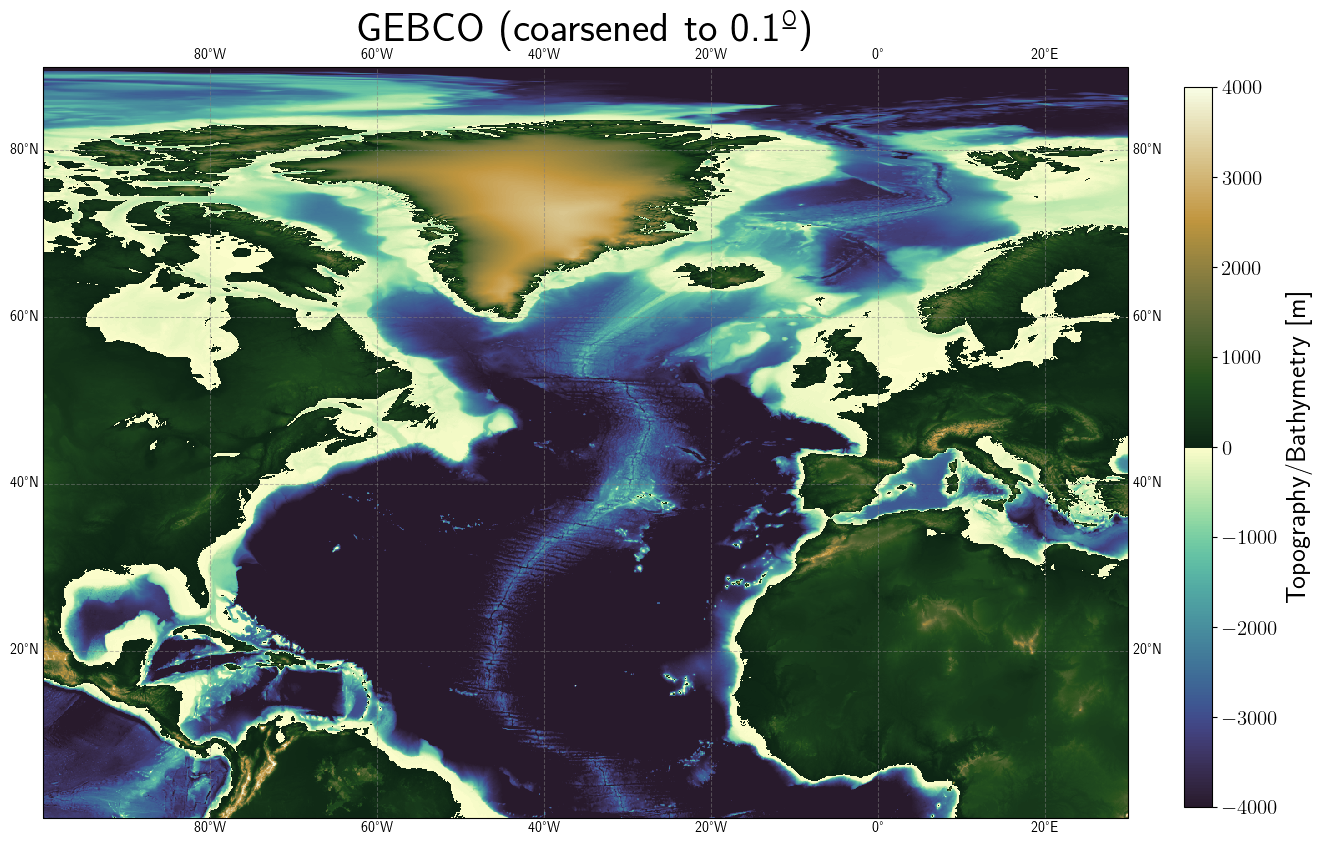

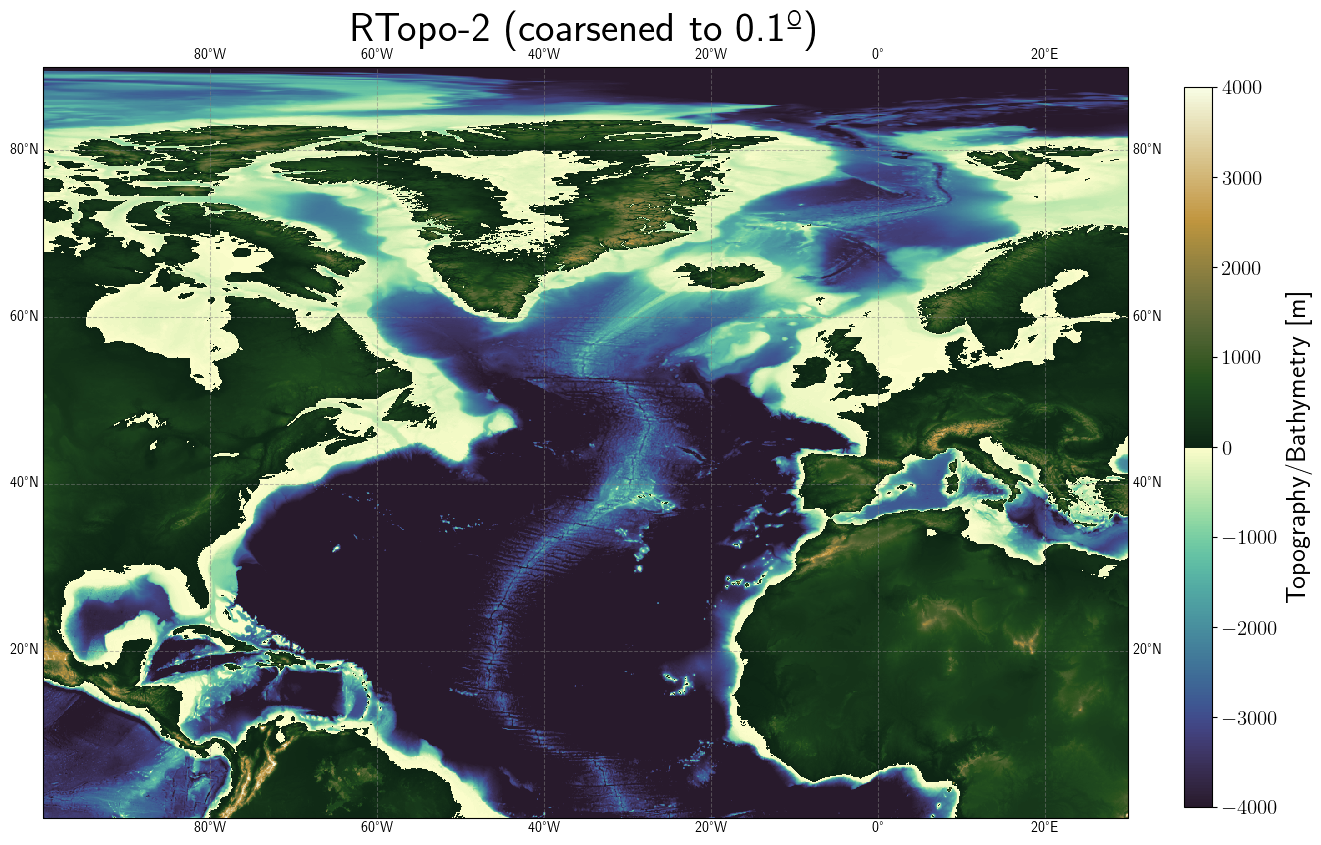

In [8]:
fig = plt.figure(figsize=(14,10))
ax = plt.subplot(projection=ccrs.PlateCarree(0))
ax.set_global();
ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,linewidth=0.75, color='gray', alpha=0.5, linestyle='--') # add lon/lat grid lines
cs = ax.pcolormesh(GEBCO_coarse.lon, GEBCO_coarse.lat,GEBCO_coarse,cmap=cm.topo,vmin=-4000, vmax=4000,transform=ccrs.PlateCarree())
ax.set_extent([-100, 30, 0, 90], crs=ccrs.PlateCarree())
ax.set_title('GEBCO (coarsened to 0.1º)', fontsize=30)
cax = fig.add_axes([0.94, 0.13,0.02, 0.72])
cbar=plt.colorbar(cs,cax = cax,orientation='vertical')
cbar.set_label('Topography/Bathymetry [m]', fontsize = 20)
plt.show()

fig = plt.figure(figsize=(14,10))
ax = plt.subplot(projection=ccrs.PlateCarree(0))
ax.set_global();
ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,linewidth=0.75, color='gray', alpha=0.5, linestyle='--') # add lon/lat grid lines
cs = ax.pcolormesh(RTopo_coarse.lon, RTopo_coarse.lat,RTopo_coarse,cmap=cm.topo,vmin=-4000, vmax=4000,transform=ccrs.PlateCarree())
ax.set_extent([-100, 30, 0, 90], crs=ccrs.PlateCarree())
ax.set_title('RTopo-2 (coarsened to 0.1º)', fontsize=30)
cax = fig.add_axes([0.94, 0.13,0.02, 0.72])
cbar=plt.colorbar(cs,cax = cax,orientation='vertical')
cbar.set_label('Topography/Bathymetry [m]', fontsize = 20)
plt.show()

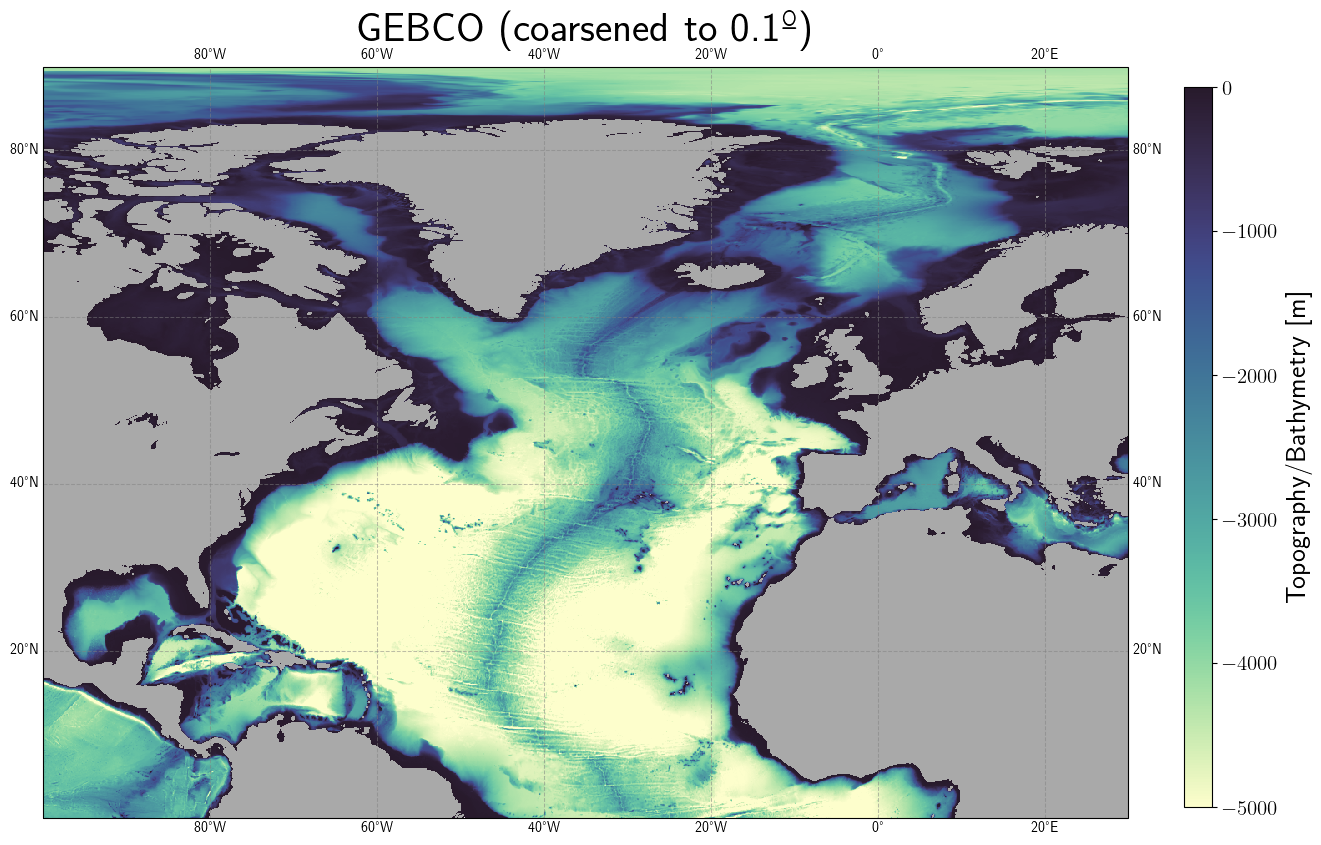

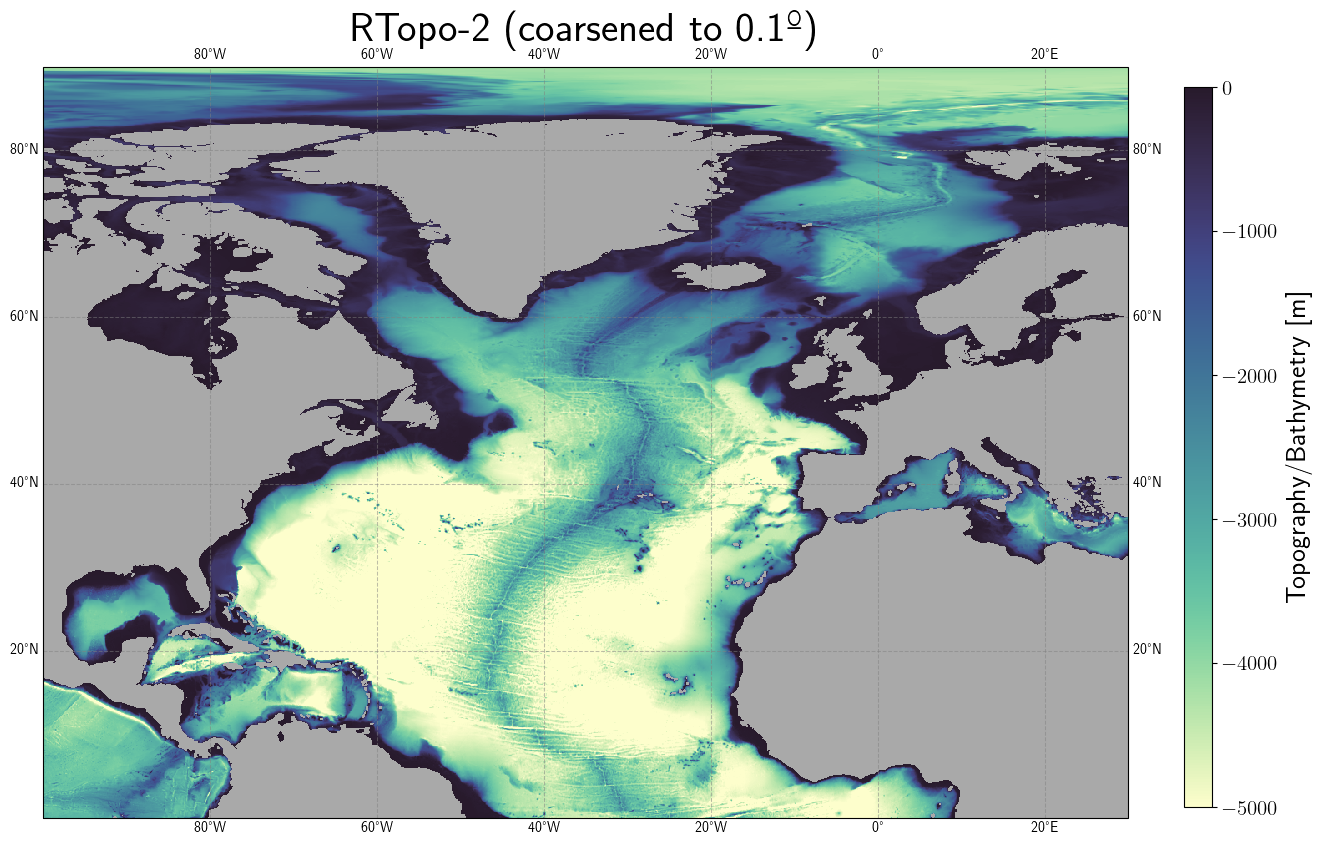

In [9]:
fig = plt.figure(figsize=(14,10))
ax = plt.subplot(projection=ccrs.PlateCarree(0))
ax.set_global();
ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,linewidth=0.75, color='gray', alpha=0.5, linestyle='--') # add lon/lat grid lines
cs = ax.pcolormesh(GEBCO_coarse.lon, GEBCO_coarse.lat,GEBCO_coarse*GEBCO_mask_plot,cmap=cm.deep,vmin=-5000, vmax=0,transform=ccrs.PlateCarree())
ax.contourf(GEBCO_coarse.lon, GEBCO_coarse.lat,GEBCO_coarse.where(GEBCO_coarse>0)*0+1,colors=['darkgrey'],transform=ccrs.PlateCarree())
ax.set_extent([-100, 30, 0, 90], crs=ccrs.PlateCarree())
ax.set_title('GEBCO (coarsened to 0.1º)', fontsize=30)
cax = fig.add_axes([0.94, 0.13,0.02, 0.72])
cbar=plt.colorbar(cs,cax = cax,orientation='vertical')
cbar.set_label('Topography/Bathymetry [m]', fontsize = 20)
plt.show()

fig = plt.figure(figsize=(14,10))
ax = plt.subplot(projection=ccrs.PlateCarree(0))
ax.set_global();
ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,linewidth=0.75, color='gray', alpha=0.5, linestyle='--') # add lon/lat grid lines
cs = ax.pcolormesh(RTopo_coarse.lon, RTopo_coarse.lat,RTopo_coarse*RTopo_mask_plot,cmap=cm.deep,vmin=-5000, vmax=0,transform=ccrs.PlateCarree())
ax.contourf(RTopo_coarse.lon, RTopo_coarse.lat,RTopo_mask_coarse.where(RTopo_mask_coarse>0)*0+1,colors=['darkgrey'],transform=ccrs.PlateCarree())
ax.set_extent([-100, 30, 0, 90], crs=ccrs.PlateCarree())
ax.set_title('RTopo-2 (coarsened to 0.1º)', fontsize=30)
cax = fig.add_axes([0.94, 0.13,0.02, 0.72])
cbar=plt.colorbar(cs,cax = cax,orientation='vertical')
cbar.set_label('Topography/Bathymetry [m]', fontsize = 20)
plt.show()

Now want to get gradients out of raw (uncoarsened) RTopo2 data for the North Atlantic (ocean only) region. First step is to generate dx and dy (in km) arrays.

In [10]:
RTopo_ocean = RTopo.bedrock_topography.where(RTopo_mask==0)

In [12]:
R = 6371e3 # m
dx = xr.DataArray(np.zeros((10801,15601)), coords=[RTopo_ocean.lat, RTopo_ocean.lon], dims=['lat', 'lon'])
dy = xr.DataArray(np.zeros((10801,15601)), coords=[RTopo_ocean.lat, RTopo_ocean.lon], dims=['lat', 'lon'])
for i in range(10801):
    dx[i,:] = np.arccos((np.sin(dx.lat[i]*np.pi/180)**2)+(np.cos(dx.lat[i]*np.pi/180)**2)*np.cos(np.diff(np.pi/180*dx.lon)[0]))*R
for i in range(10800):
    dy[i,:] = np.arccos(np.sin(dx.lat[i]*np.pi/180)*np.sin(dx.lat[i+1]*np.pi/180) + np.cos(dx.lat[i]*np.pi/180)*np.cos(dx.lat[i+1]*np.pi/180  ))*R
                        

In [54]:
dRTopo_dx = RTopo_ocean.diff('lon')[:-1,:]/dx[:-1,:-1]
dRTopo_dy = RTopo_ocean.diff('lat')[:,:-1]/dy[:-1,:-1]

In [55]:
dRTopo_dx_coarsen = dRTopo_dx.coarsen(lat=12, boundary="trim").mean()
dRTopo_dx_coarsen = dRTopo_dx_coarsen.coarsen(lon=12, boundary="trim").mean()
dRTopo_dy_coarsen = dRTopo_dy.coarsen(lat=12, boundary="trim").mean()
dRTopo_dy_coarsen = dRTopo_dy_coarsen.coarsen(lon=12, boundary="trim").mean()


In [15]:
dRTopo_dx_coarsen


<xarray.DataArray (lat: 900, lon: 1299)>
array([[ 0.00870307, -0.0117765 , -0.00254495, ...,         nan,
                nan,         nan],
       [ 0.00581892, -0.00990997, -0.00067654, ...,         nan,
                nan,         nan],
       [ 0.00592204, -0.00908171, -0.00369377, ...,         nan,
                nan,         nan],
       ...,
       [ 0.0206247 ,  0.02266594,  0.02182251, ..., -0.00404972,
        -0.00430232, -0.00446016],
       [-0.00357812, -0.00327906, -0.00212573, ..., -0.00491168,
        -0.00504348, -0.00449618],
       [-0.00071367, -0.00070432, -0.00069857, ...,  0.02907672,
        -0.15290214,  0.00188257]])
Coordinates:
  * lon      (lon) float64 -99.95 -99.85 -99.75 -99.65 ... 29.65 29.75 29.85
  * lat      (lat) float64 0.04583 0.1458 0.2458 0.3458 ... 89.75 89.85 89.95

In [56]:
dRTopo_dy_coarsen

<xarray.DataArray (lat: 899, lon: 1300)>
array([[ 0.00212964, -0.00294844, -0.00057143, ...,         nan,
                nan,         nan],
       [ 0.00967489, -0.00999067,  0.01238012, ...,         nan,
                nan,         nan],
       [ 0.0117984 ,  0.0007834 ,  0.00338769, ...,         nan,
                nan,         nan],
       ...,
       [ 0.00776811,  0.00840317,  0.00901003, ..., -0.00175944,
        -0.00168741, -0.00161209],
       [-0.01603584, -0.01646208, -0.01686771, ...,  0.00040745,
         0.00041495,  0.00042228],
       [-0.00394072, -0.00392157, -0.00392293, ...,  0.00059592,
         0.000615  ,  0.00063378]])
Coordinates:
  * lat      (lat) float64 0.05417 0.1542 0.2542 0.3542 ... 89.65 89.75 89.85
  * lon      (lon) float64 -99.95 -99.85 -99.75 -99.65 ... 29.75 29.85 29.95

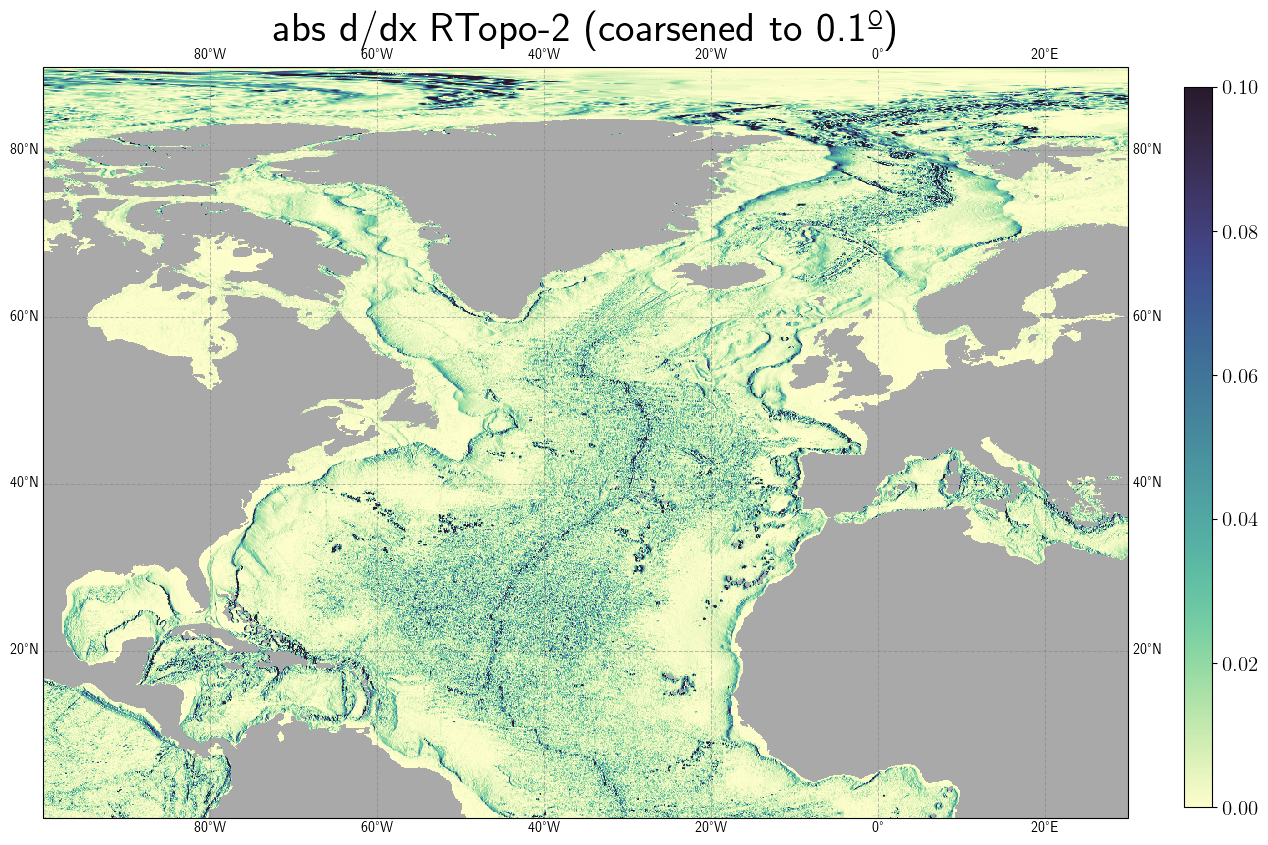

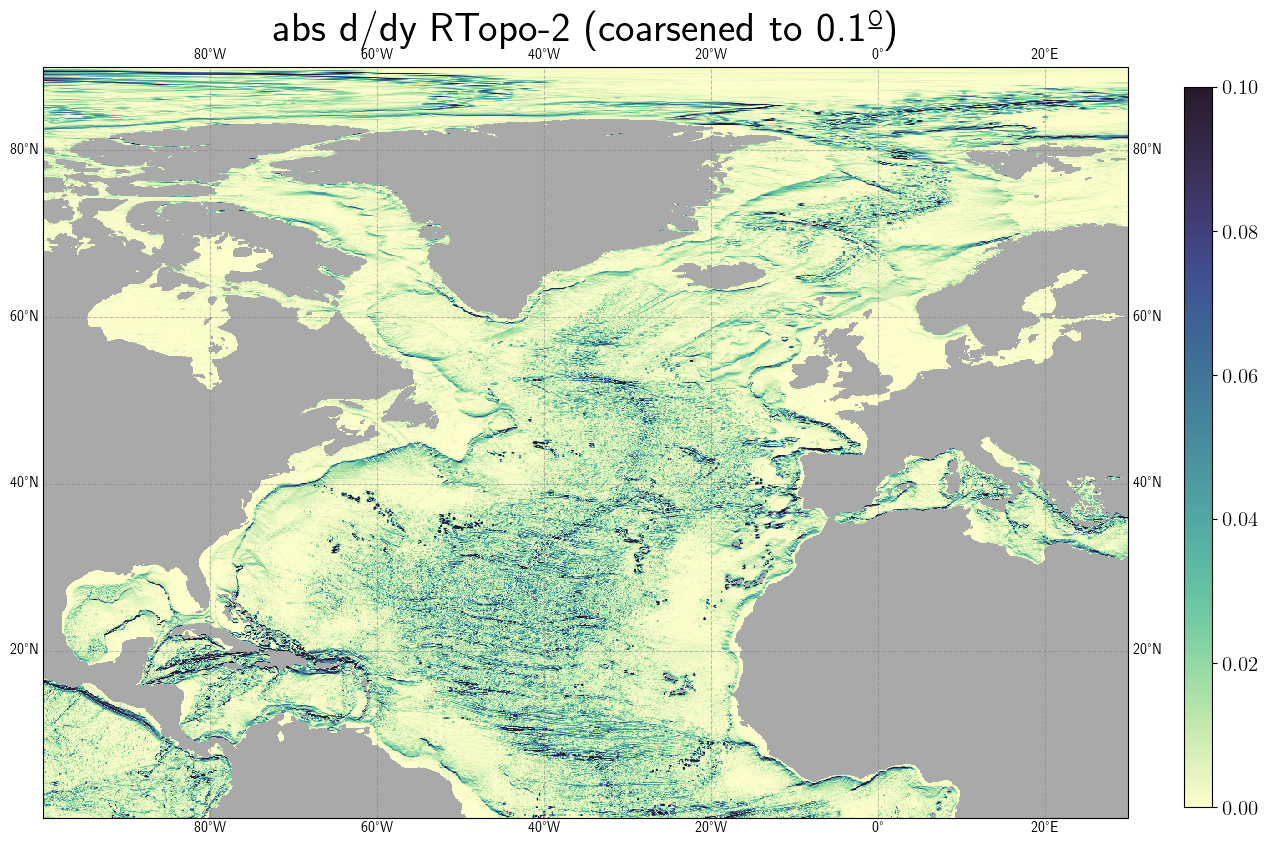

In [58]:
fig = plt.figure(figsize=(14,10))
ax = plt.subplot(projection=ccrs.PlateCarree(0))
ax.set_global();
ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,linewidth=0.75, color='gray', alpha=0.5, linestyle='--') # add lon/lat grid lines
cs = ax.pcolormesh(dRTopo_dx_coarsen.lon, dRTopo_dx_coarsen.lat,np.abs(dRTopo_dx_coarsen),vmax=0.1,cmap=cm.deep,transform=ccrs.PlateCarree())
ax.contourf(RTopo_coarse.lon, RTopo_coarse.lat,RTopo_mask_coarse.where(RTopo_mask_coarse>0)*0+1,colors=['darkgrey'],transform=ccrs.PlateCarree())
ax.set_extent([-100, 30, 0, 90], crs=ccrs.PlateCarree())
ax.set_title('abs d/dx RTopo-2 (coarsened to 0.1º)', fontsize=30)
cax = fig.add_axes([0.94, 0.13,0.02, 0.72])
cbar=plt.colorbar(cs,cax = cax,orientation='vertical')
# cbar.set_label('Topography/Bathymetry [m]', fontsize = 20)
plt.show()

fig = plt.figure(figsize=(14,10))
ax = plt.subplot(projection=ccrs.PlateCarree(0))
ax.set_global();
ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,linewidth=0.75, color='gray', alpha=0.5, linestyle='--') # add lon/lat grid lines
cs = ax.pcolormesh(dRTopo_dy_coarsen.lon, dRTopo_dy_coarsen.lat,np.abs(dRTopo_dy_coarsen),vmax=0.1,cmap=cm.deep,transform=ccrs.PlateCarree())
ax.contourf(RTopo_coarse.lon, RTopo_coarse.lat,RTopo_mask_coarse.where(RTopo_mask_coarse>0)*0+1,colors=['darkgrey'],transform=ccrs.PlateCarree())
ax.set_extent([-100, 30, 0, 90], crs=ccrs.PlateCarree())
ax.set_title('abs d/dy RTopo-2 (coarsened to 0.1º)', fontsize=30)
cax = fig.add_axes([0.94, 0.13,0.02, 0.72])
cbar=plt.colorbar(cs,cax = cax,orientation='vertical')
# cbar.set_label('Topography/Bathymetry [m]', fontsize = 20)
plt.show()

In [59]:
rootdir = '/export/data1/rmoorman/GRACE-GRACEFO/'
mascon_ds = xr.open_dataset(rootdir+'GRCTellus.JPL.200204_202105.GLO.RL06M.MSCNv02CRI-with-indices.nc')
mascons = mascon_ds.mascon_index
new_lon = np.concatenate((mascons.lon.values[:360],(mascons.lon.values[360:]-360)))
mascons = mascons.assign_coords(lon=new_lon)
mascons = mascons.sortby('lon')
mascons = mascons.sel(lon=slice(-100,30), lat=slice(0,90))

In [60]:
dRTopo_dx_coarsen2 = dRTopo_dx_coarsen.coarsen(lat=5, boundary="pad").mean()
dRTopo_dx_coarsen2 = dRTopo_dx_coarsen2.coarsen(lon=5, boundary="pad").mean()
dRTopo_dx_coarsen2 = dRTopo_dx_coarsen2.interp(lat=mascons.lat.values)
dRTopo_dx_coarsen2 = dRTopo_dx_coarsen2.interp(lon=mascons.lon.values)
dRTopo_dy_coarsen2 = dRTopo_dy_coarsen.coarsen(lat=5, boundary="pad").mean()
dRTopo_dy_coarsen2 = dRTopo_dy_coarsen2.coarsen(lon=5, boundary="pad").mean()
dRTopo_dy_coarsen2 = dRTopo_dy_coarsen2.interp(lat=mascons.lat.values)
dRTopo_dy_coarsen2 = dRTopo_dy_coarsen2.interp(lon=mascons.lon.values)

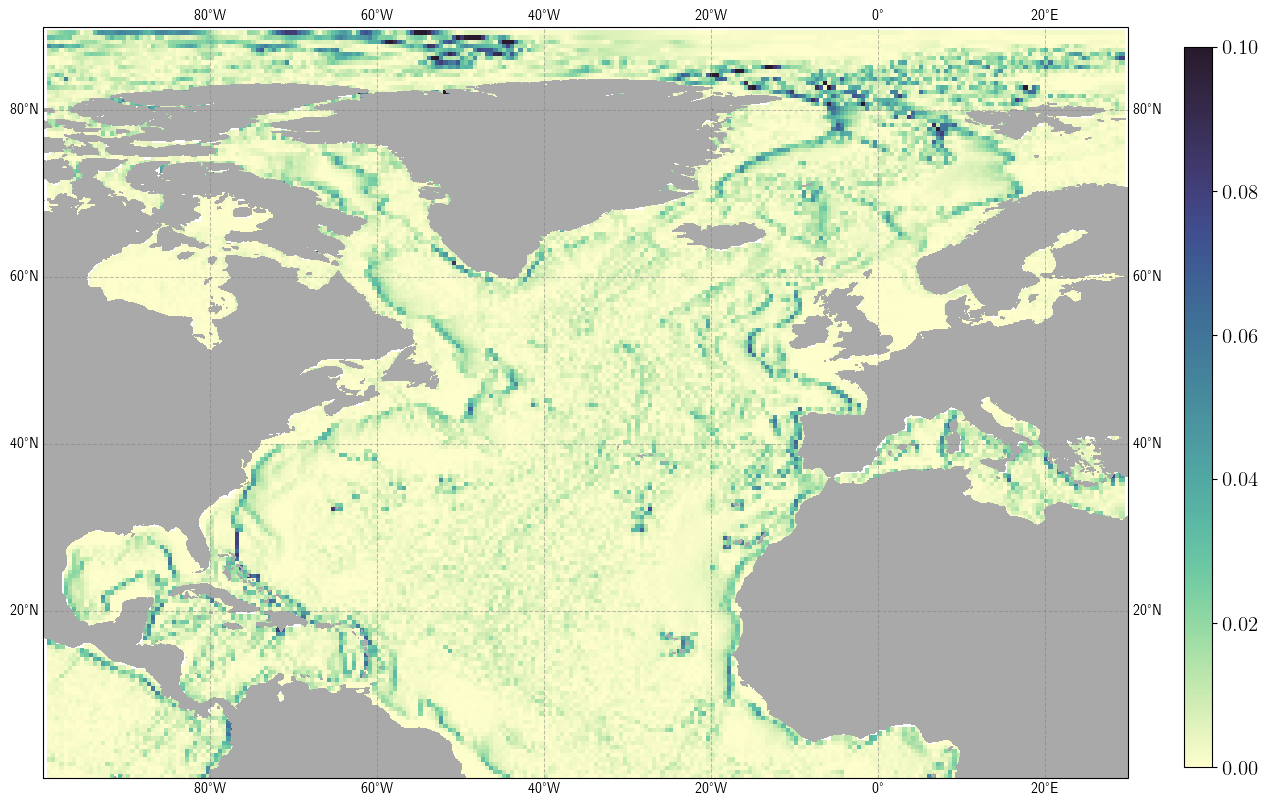

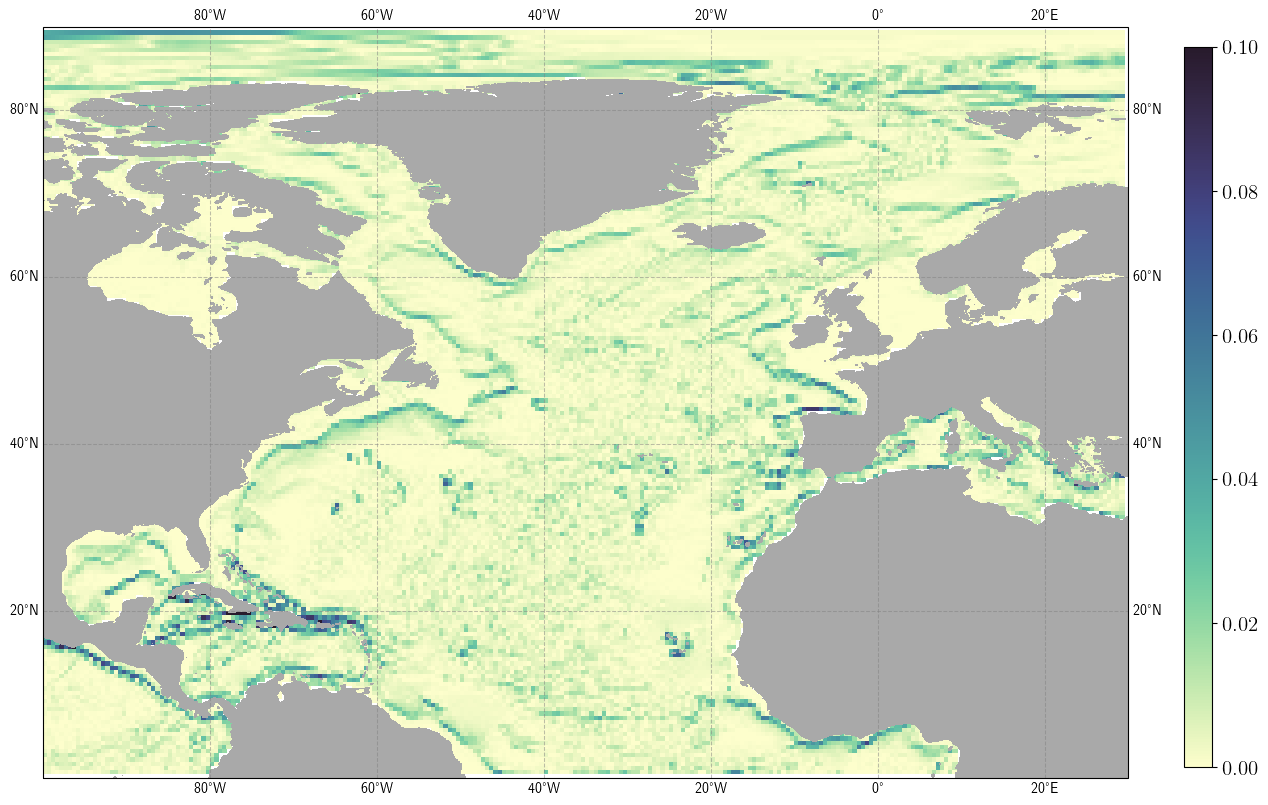

In [62]:
fig = plt.figure(figsize=(14,10))
ax = plt.subplot(projection=ccrs.PlateCarree(0))
ax.set_global();
ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,linewidth=0.75, color='gray', alpha=0.5, linestyle='--') # add lon/lat grid lines
cs = ax.pcolormesh(dRTopo_dx_coarsen2.lon, dRTopo_dx_coarsen2.lat,np.abs(dRTopo_dx_coarsen2),vmax=0.1,cmap=cm.deep,transform=ccrs.PlateCarree())
ax.contourf(RTopo_coarse.lon, RTopo_coarse.lat,RTopo_mask_coarse.where(RTopo_mask_coarse>0)*0+1,colors=['darkgrey'],transform=ccrs.PlateCarree())
ax.set_extent([-100, 30, 0, 90], crs=ccrs.PlateCarree())
# ax.set_title('RTopo-2 (coarsened to 0.1º)', fontsize=30)
cax = fig.add_axes([0.94, 0.13,0.02, 0.72])
cbar=plt.colorbar(cs,cax = cax,orientation='vertical')
# cbar.set_label('Topography/Bathymetry [m]', fontsize = 20)
plt.show()

fig = plt.figure(figsize=(14,10))
ax = plt.subplot(projection=ccrs.PlateCarree(0))
ax.set_global();
ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,linewidth=0.75, color='gray', alpha=0.5, linestyle='--') # add lon/lat grid lines
cs = ax.pcolormesh(dRTopo_dy_coarsen2.lon, dRTopo_dy_coarsen2.lat,np.abs(dRTopo_dy_coarsen2),vmax=0.1,cmap=cm.deep,transform=ccrs.PlateCarree())
ax.contourf(RTopo_coarse.lon, RTopo_coarse.lat,RTopo_mask_coarse.where(RTopo_mask_coarse>0)*0+1,colors=['darkgrey'],transform=ccrs.PlateCarree())
ax.set_extent([-100, 30, 0, 90], crs=ccrs.PlateCarree())
# ax.set_title('RTopo-2 (coarsened to 0.1º)', fontsize=30)
cax = fig.add_axes([0.94, 0.13,0.02, 0.72])
cbar=plt.colorbar(cs,cax = cax,orientation='vertical')
# cbar.set_label('Topography/Bathymetry [m]', fontsize = 20)
plt.show()

In [63]:
dRTopo_dx_coarsen2 = dRTopo_dx_coarsen2.assign_coords({'mascon_id':mascons})
dRTopo_dx_mascon_id = dRTopo_dx_coarsen2.groupby('mascon_id').mean()
dRTopo_dy_coarsen2 = dRTopo_dy_coarsen2.assign_coords({'mascon_id':mascons})
dRTopo_dy_mascon_id = dRTopo_dy_coarsen2.groupby('mascon_id').mean()

In [44]:
dRTopo_dx_mascon_grid = np.zeros((180,260))
mascon_indices = dRTopo_dx_mascon_id.mascon_id.values
for m in range(867):
    ind = mascon_indices[m]
    i,j = np.where(mascons==ind)
    for k in range(len(i)):
        dRTopo_dx_mascon_grid[i[k],j[k]] = dRTopo_dx_mascon_id.sel(mascon_id=ind)

In [64]:
dRTopo_dy_mascon_grid = np.zeros((180,260))
mascon_indices = dRTopo_dy_mascon_id.mascon_id.values
for m in range(867):
    ind = mascon_indices[m]
    i,j = np.where(mascons==ind)
    for k in range(len(i)):
        dRTopo_dy_mascon_grid[i[k],j[k]] = dRTopo_dy_mascon_id.sel(mascon_id=ind)

In [65]:
dRTopo_dx_mascon_grid = xr.DataArray(dRTopo_dx_mascon_grid, coords = [dRTopo_dx_coarsen2.lat, dRTopo_dx_coarsen2.lon], dims=['lat','lon'])
dRTopo_dy_mascon_grid = xr.DataArray(dRTopo_dy_mascon_grid, coords = [dRTopo_dy_coarsen2.lat, dRTopo_dy_coarsen2.lon], dims=['lat','lon'])


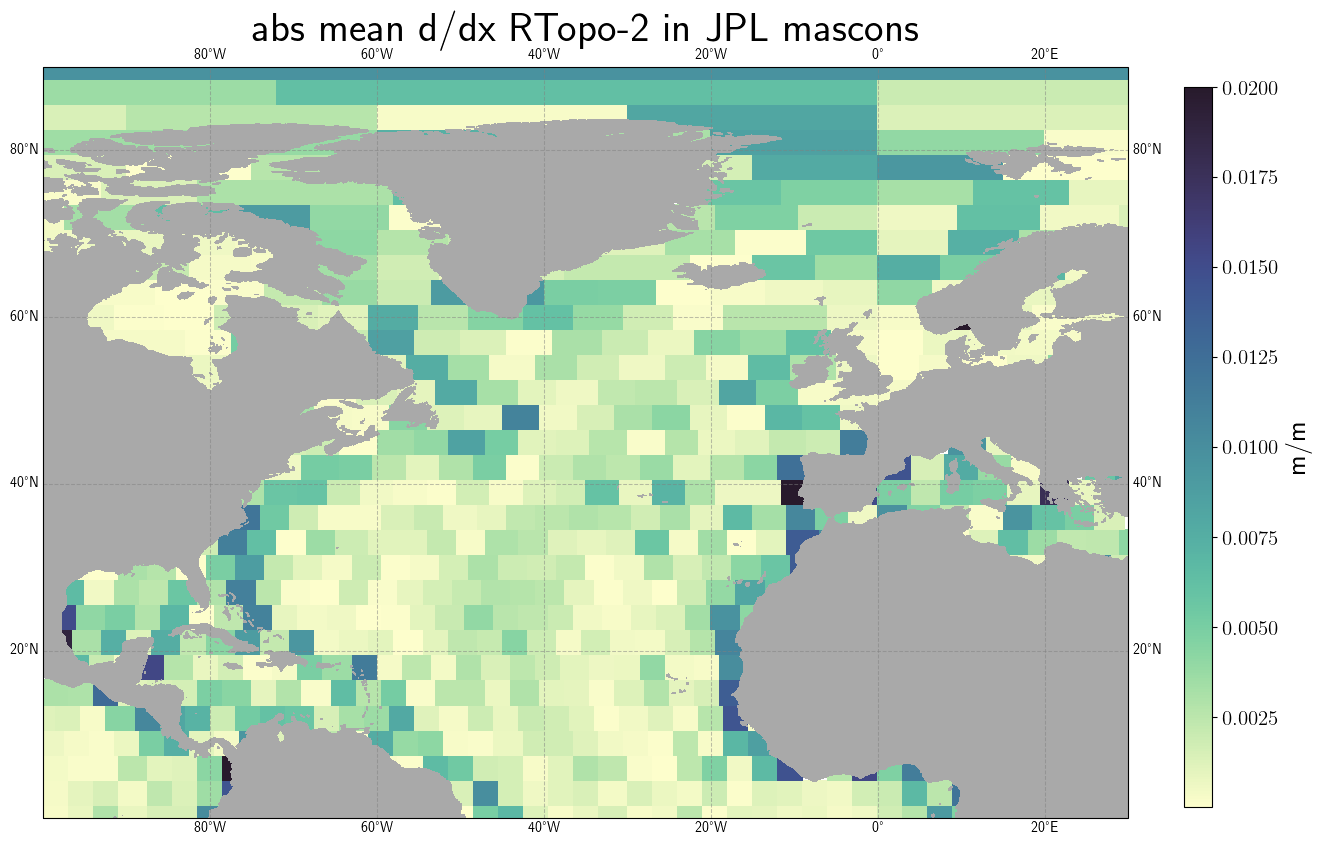

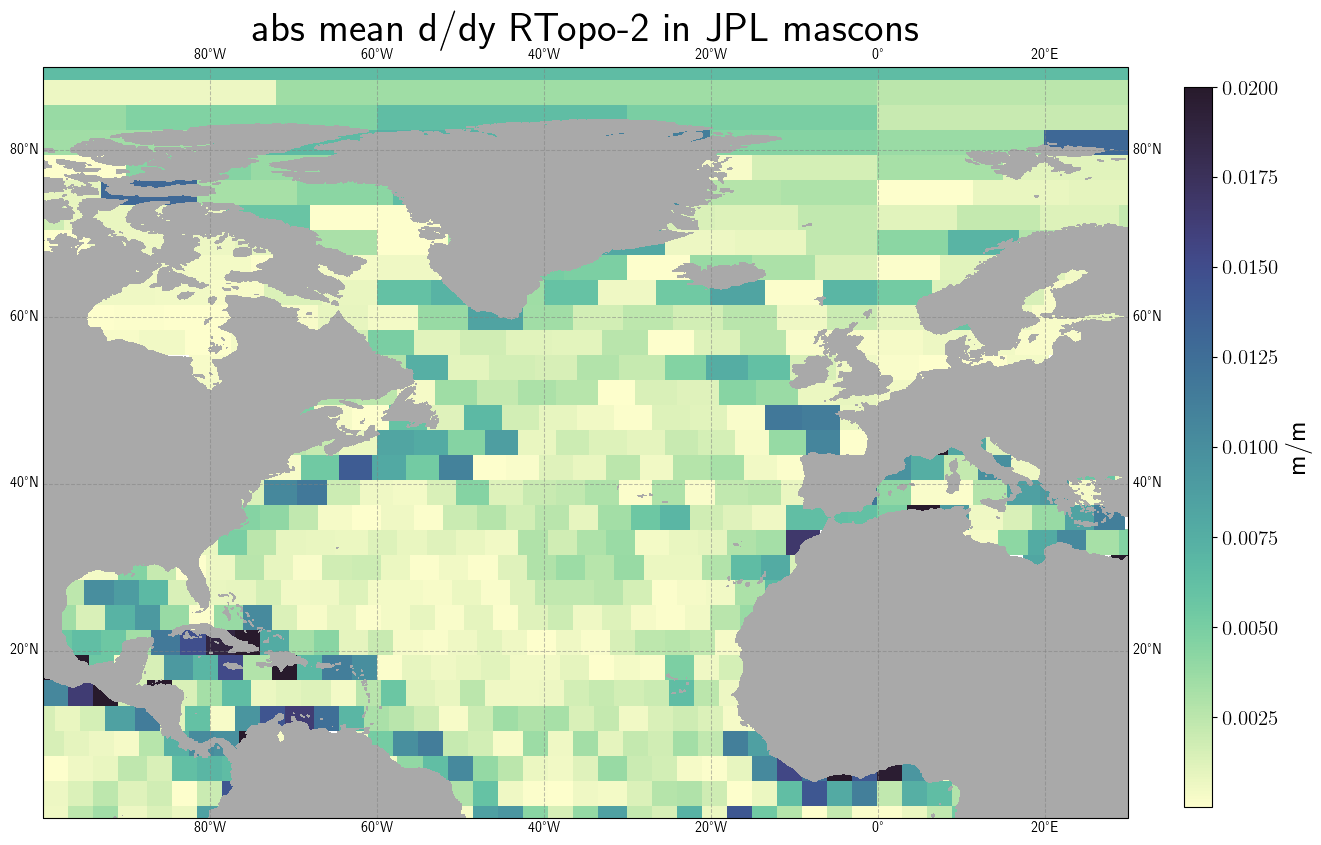

In [68]:
fig = plt.figure(figsize=(14,10))
ax = plt.subplot(projection=ccrs.PlateCarree(0))
ax.set_global();
ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,linewidth=0.75, color='gray', alpha=0.5, linestyle='--') # add lon/lat grid lines
cs = ax.pcolormesh(dRTopo_dx_mascon_grid.lon, dRTopo_dx_mascon_grid.lat,np.abs(dRTopo_dx_mascon_grid),vmax=0.02,cmap=cm.deep,transform=ccrs.PlateCarree())
ax.contourf(RTopo_coarse.lon, RTopo_coarse.lat,RTopo_mask_coarse.where(RTopo_mask_coarse>0)*0+1,colors=['darkgrey'],transform=ccrs.PlateCarree())
ax.set_extent([-100, 30, 0, 90], crs=ccrs.PlateCarree())
ax.set_title('abs mean d/dx RTopo-2 in JPL mascons', fontsize=30)
cax = fig.add_axes([0.94, 0.13,0.02, 0.72])
cbar=plt.colorbar(cs,cax = cax,orientation='vertical')
cbar.set_label('m/m', fontsize = 20)
plt.show()

fig = plt.figure(figsize=(14,10))
ax = plt.subplot(projection=ccrs.PlateCarree(0))
ax.set_global();
ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,linewidth=0.75, color='gray', alpha=0.5, linestyle='--') # add lon/lat grid lines
cs = ax.pcolormesh(dRTopo_dy_mascon_grid.lon, dRTopo_dy_mascon_grid.lat,np.abs(dRTopo_dy_mascon_grid),vmax=0.02,cmap=cm.deep,transform=ccrs.PlateCarree())
ax.contourf(RTopo_coarse.lon, RTopo_coarse.lat,RTopo_mask_coarse.where(RTopo_mask_coarse>0)*0+1,colors=['darkgrey'],transform=ccrs.PlateCarree())
ax.set_extent([-100, 30, 0, 90], crs=ccrs.PlateCarree())
ax.set_title('abs mean d/dy RTopo-2 in JPL mascons', fontsize=30)
cax = fig.add_axes([0.94, 0.13,0.02, 0.72])
cbar=plt.colorbar(cs,cax = cax,orientation='vertical')
cbar.set_label('m/m', fontsize = 20)
plt.show()